Improving Computer Vision Accuracy using Convolutions



In [1]:
# importing packages
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

2024-10-08 18:16:46.832300: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# loading data
fashion_mnist = K.datasets.fashion_mnist
(training_images,training_labels),(testing_images,testing_labels) = fashion_mnist.load_data()
train_x = training_images/255.
train_y = training_labels

test_x = testing_images/255.
test_y = testing_labels

In [3]:
print("train_x.shape:",train_x.shape)
print("train_y.shape:",train_y.shape)
print()
print("test_x.shape:",test_x.shape)
print("test_y.shape:",test_y.shape)

train_x.shape: (60000, 28, 28)
train_y.shape: (60000,)

test_x.shape: (10000, 28, 28)
test_y.shape: (10000,)


In [5]:
# definint and compiling model

model = K.Sequential([
    K.Input(shape=(28,28)),
    K.layers.Flatten(),
    K.layers.Dense(128,activation='relu'),
    K.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [6]:
# training and evaluating the model

print("Training Model!")
model.fit(train_x,train_y,epochs=5)

print("Evaluating Model!")
model.evaluate(test_x,test_y,verbose=1)

Training Model!
Epoch 1/5
1875/1875 [==============================] - 100s 52ms/step - loss: 0.4962 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.3709 - accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.3343 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3093 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2905 - accuracy: 0.8936
Evaluating Model!
313/313 [==============================] - 13s 40ms/step - loss: 0.3692 - accuracy: 0.8688


[0.36916640400886536, 0.8687999844551086]

In [7]:
# defining and compiling model with convolutional layers

model = K.Sequential([
    K.Input(shape=(28,28,1)),
    
    K.layers.Conv2D(64,(3,3),activation='relu'),
    K.layers.MaxPooling2D((2,2)),
    K.layers.Conv2D(64,(3,3),activation='relu'),
    K.layers.MaxPooling2D((2,2)),
    K.layers.Conv2D(64,(3,3),activation='relu'),
    K.layers.MaxPooling2D((2,2)),

    K.layers.Flatten(),
    K.layers.Dense(128,activation='relu'),
    K.layers.Dense(10,activation='softmax')
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    

In [8]:
model.summary()

print("Training Model with Convolutional layers! ")
model.fit(train_x,train_y,epochs = 5)

print("Evaluating Model with Convolutional layers!")
model.evaluate(test_x,test_y,verbose=1)


Training Model with Convolutional layers! 
Epoch 1/5
1875/1875 [==============================] - 217s 114ms/step - loss: 0.5740 - accuracy: 0.7914
Epoch 2/5
1875/1875 [==============================] - 226s 120ms/step - loss: 0.3919 - accuracy: 0.8561
Epoch 3/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.3345 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 240s 128ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 234s 125ms/step - loss: 0.2727 - accuracy: 0.8986
Evaluating Model with Convolutional layers!
313/313 [==============================] - 18s 55ms/step - loss: 0.3276 - accuracy: 0.8836


[0.32763269543647766, 0.8835999965667725]

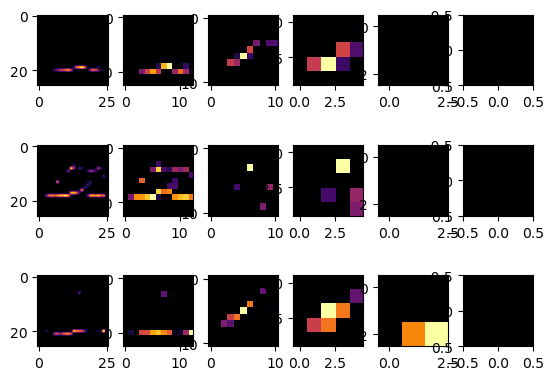

In [10]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_x[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
  
    f2 = activation_model.predict(test_x[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
  
    f3 = activation_model.predict(test_x[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)